## Downloading Dataset

In [1]:
from mit_d3m import load_dataset # Importing Dataset
baseball = load_dataset('185_baseball') # Loading Dataset

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Dataset Context

In [2]:
baseball.context

{'target_entity': 'learningData',
 'entities': {'learningData': (          d3mIndex        Player  Number_seasons  Games_played  At_bats  Runs  \
   d3mIndex                                                                        
   0                0    HANK_AARON              23          3298    12364  2174   
   1                1   JERRY_ADAIR              13          1165     4019   378   
   3                3   BOBBY_ADAMS              14          1281     4019   591   
   4                4    JOE_ADCOCK              17          1959     6606   823   
   5                5   TOMMIE_AGEE              12          1129     3912   558   
   ...            ...           ...             ...           ...      ...   ...   
   1333          1333   ROSS_YOUNGS              10          1211     4627   812   
   1334          1334    AL_ZARILLA              10          1120     3535   507   
   1336          1336  CHIEF_ZIMMER              19          1280     4546   617   
   1337       

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Importing Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import warnings

### Models

In [4]:
from sdv.tabular import GaussianCopula # Importing 'GaussianCoupla' Model
from sdv.tabular import CTGAN # Importing 'CTGAN' Model
from sdv.tabular import CopulaGAN # Importing 'CopulaGAN' Model

### Evaluation Metrics

In [5]:
from sdv.evaluation import evaluate # Importing 'evaluate' Class for Synthetic Dataset Evaluation

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Removing Warning Messages

In [6]:
warnings.filterwarnings(action = 'ignore')

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Predictor & Response Variable

In [7]:
X = baseball.X # Predictor Variables
y = baseball.y # Response Variables

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Data Pre-Processing

In [8]:
dataset = pd.concat([X,y], axis = 1) # Joining 'X' & 'y' in a Single Data Frame
dataset.isnull().sum() # Printing Total 'NULL' Values in the Dataset

d3mIndex            0
Player              0
Number_seasons      0
Games_played        0
At_bats             0
Runs                0
Hits                0
Doubles             0
Triples             0
Home_runs           0
RBIs                0
Walks               0
Strikeouts         18
Batting_average     0
On_base_pct         0
Slugging_pct        0
Fielding_ave        0
Position            0
Hall_of_Fame        0
dtype: int64

In [9]:
dataset

,d3mIndex,Player,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
d3mIndex,,,,,,,,,,,,,,,,,,,
0,0,HANK_AARON,23,3298,12364,2174,3771,624,98,755,2297,1402,1383.0,0.305,0.377,0.555,0.980,Outfield,1
1,1,JERRY_ADAIR,13,1165,4019,378,1022,163,19,57,366,208,499.0,0.254,0.294,0.347,0.985,Second_base,0
3,3,BOBBY_ADAMS,14,1281,4019,591,1082,188,49,37,303,414,447.0,0.269,0.340,0.368,0.955,Third_base,0
4,4,JOE_ADCOCK,17,1959,6606,823,1832,295,35,336,1122,594,1059.0,0.277,0.339,0.485,0.994,First_base,0
5,5,TOMMIE_AGEE,12,1129,3912,558,999,170,27,130,433,342,918.0,0.255,0.321,0.412,0.975,Outfield,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,ROSS_YOUNGS,10,1211,4627,812,1491,236,93,42,592,550,390.0,0.322,0.399,0.441,0.953,Outfield,2
1334,1334,AL_ZARILLA,10,1120,3535,507,975,186,43,61,456,415,382.0,0.276,0.357,0.405,0.974,Outfield,0
1336,1336,CHIEF_ZIMMER,19,1280,4546,617,1224,222,76,26,620,390,323.0,0.269,0.339,0.369,0.952,Catcher,0


### Removing Empty Values

In [10]:
dataset = dataset.drop(['d3mIndex'], axis = 1) # Removing Number Index
dataset = dataset.dropna(inplace = False) # Removing All 'NULL' Values
dataset.isnull().sum() # Printing the Results

Player             0
Number_seasons     0
Games_played       0
At_bats            0
Runs               0
Hits               0
Doubles            0
Triples            0
Home_runs          0
RBIs               0
Walks              0
Strikeouts         0
Batting_average    0
On_base_pct        0
Slugging_pct       0
Fielding_ave       0
Position           0
Hall_of_Fame       0
dtype: int64

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Exploratory Data Analysis

In [11]:
seasons = pd.DataFrame(dataset.Number_seasons) # Extracting Number of Seasons Information
strike_outs = pd.DataFrame(dataset.Strikeouts) # Extracting Information of the Strikeouts
runs = pd.DataFrame(dataset.Runs) # Extracting Information of the Runs

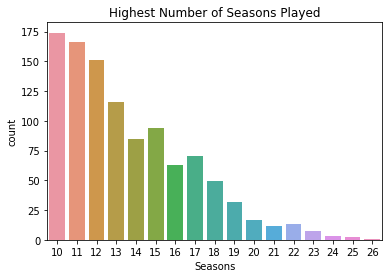

In [12]:
seasons.columns = ['Seasons'] # Giving Column Name

sns.countplot(x = 'Seasons', data = seasons) # Plotting The Count Graph
plt.title('Highest Number of Seasons Played') # Giving Title To The Graph
plt.show() # Showing The Graph

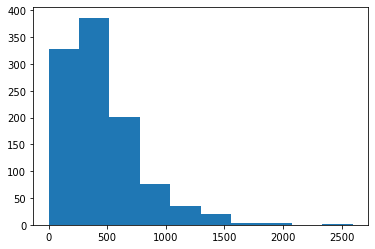

In [13]:
plt.hist(strike_outs, bins = 10) # Histogram
plt.show() # Displaying the Plot

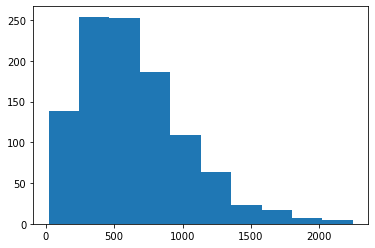

In [14]:
plt.hist(runs, bins = 10) # Histogram
plt.show() # Displaying the Plot

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

## Synthetic Data Instances

### Gaussian Copula Model

In [ ]:
syn_model = GaussianCopula() # Initializing the Model
syn_model.fit(dataset) # Applying the Model on the Data

#### Saving The Synthetic Data Generator Model

In [ ]:
syn_model.save('Saved Model/Gaussian.pkl')

#### Loading The Saved Synthetic Data Generator Model

In [15]:
gaussian = GaussianCopula.load('Saved Model/Gaussian.pkl')

In [16]:
syn_data = gaussian.sample(num_rows = 100) # Generating Synthetic Data
syn_data # Printing the Generated Data

,Player,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,BENNIE_TATE,11,1173,3306,440,758,123,52,207,533,535,985.0,0.242631,0.329288,0.449327,0.981901,Outfield,0
1,FRANK_DUFFY,20,2259,8678,1533,2642,487,121,197,1338,1001,907.0,0.308845,0.377659,0.475807,0.969367,Catcher,1
2,PETE_REISER,14,1771,6449,991,1832,298,59,76,751,865,225.0,0.265882,0.351144,0.350775,0.975512,Shortstop,0
3,BOB_BOONE,11,748,2075,286,421,54,10,7,67,150,230.0,0.231966,0.295588,0.268888,0.929138,Catcher,0
4,DANNY_LITWHILER,18,1867,6211,728,1791,355,102,97,603,796,328.0,0.287567,0.373606,0.386290,0.994150,Shortstop,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,JIM_ESSIAN,14,1111,4146,545,1174,155,65,20,321,279,318.0,0.279258,0.338027,0.348389,0.978778,Designated_hitter,1
96,HORACE_CLARKE,12,1289,4285,563,1173,142,56,41,393,319,469.0,0.259606,0.322795,0.336267,0.972093,Shortstop,0
97,JIM_SUNDBERG,15,2060,7574,1183,2020,280,82,150,904,862,566.0,0.254570,0.339358,0.377853,0.931293,Shortstop,0
98,ANDY_THORNTON,15,1142,3394,209,836,141,27,30,253,151,540.0,0.249074,0.303863,0.330117,0.979294,Catcher,0


#### Evaluating Synthetic Instances

Statistical Metrics

In [17]:
general_evaluation = evaluate(syn_data, dataset) # Evaluating on All Metrics
CS_test = evaluate(syn_data, dataset, metrics = ['CSTest']) # Chi-Squared Test
KS_test = evaluate(syn_data, dataset, metrics = ['KSTest']) # Inverted Kolmogorov-Smirnov Test

In [18]:
evaluation = [general_evaluation, CS_test, KS_test] # Creating a List of the Results
evaluation = pd.DataFrame(evaluation) # Creating a Data Frame of the Results
evaluation.columns = ['Results'] # Gicing Column Name
evaluation.rename({0:'General Evaluation', 1:'Chi-Squared Test', 2:'Inverted Kolmogorov-Smirnov Test'}) # Renaming Row Name

,Results
General Evaluation,0.578635
Chi-Squared Test,0.999971
Inverted Kolmogorov-Smirnov Test,0.875726


In [19]:
p_CS_test = 1-CS_test # Calculating 'p-value' for Chi-Squared Test
p_KS_test = 1-KS_test # Calculating 'p-value' for Inverted Kolmogorov-Smirnov Test

In [20]:
p_value = [p_CS_test, p_KS_test] # Creating a List of the Results
p_value = pd.DataFrame(p_value) # Creating a Data Frame of the Results
p_value.columns = ['P Values'] # Gicing Column Name
p_value.rename({0:'Chi-Squared P Value', 1:'Inverted Kolmogorov-Smirnov P Value'}) # Renaming Row Name

,P Values
Chi-Squared P Value,0.000029
Inverted Kolmogorov-Smirnov P Value,0.124274


#### Exploratory Data Analysis

In [21]:
syn_seasons = pd.DataFrame(syn_data.Number_seasons) # Extracting Number of Seasons Information
syn_strike_outs = pd.DataFrame(syn_data.Strikeouts) # Extracting Information of the Strikeouts
syn_runs = pd.DataFrame(syn_data.Runs) # Extracting Information of the Runs

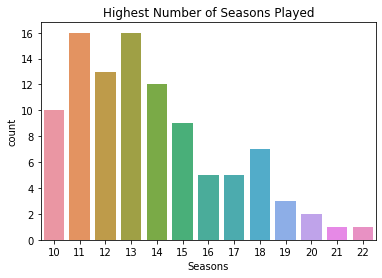

In [22]:
syn_seasons.columns = ['Seasons'] # Giving Column Name

sns.countplot(x = 'Seasons', data = syn_seasons) # Plotting The Count Graph
plt.title('Highest Number of Seasons Played') # Giving Title To The Graph
plt.show() # Showing The Graph

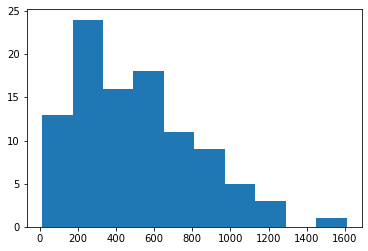

In [23]:
plt.hist(syn_strike_outs, bins = 10) # Histogram
plt.show() # Displaying the Plot

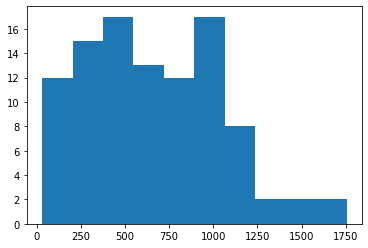

In [24]:
plt.hist(syn_runs, bins = 10) # Histogram
plt.show() # Displaying the Plot

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

### CT GAN

In [ ]:
syn_model2 = CTGAN() # Initializing the Model
syn_model2.fit(dataset) # Applying the Model on the Data

#### Saving The Synthetic Data Generator Model

In [ ]:
syn_model2.save('Saved Model/CT_GAN.pkl')

#### Loading The Saved Synthetic Data Generator Model

In [25]:
ct_gan = CTGAN.load('Saved Model/CT_GAN.pkl')

In [26]:
syn_data2 = ct_gan.sample(num_rows = 100) # Generating Synthetic Data
syn_data2 # Printing Generated Data

,Player,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,ELMER_SMITH,15,2548,3856,77,998,503,18,0,552,203,105.0,0.229890,0.390084,0.250661,0.939555,Catcher,0
1,CHARLIE_COMISKEY,13,3223,3045,553,1955,341,70,35,189,164,408.0,0.283728,0.345105,0.332720,0.867688,Outfield,0
2,BUCK_MARTINEZ,13,3232,3941,20,953,135,89,0,448,1332,538.0,0.256935,0.417860,0.232060,0.874675,Catcher,0
3,CASS_MICHAELS,11,3130,6919,413,2548,318,94,0,443,988,0.0,0.251614,0.330572,0.267484,0.893389,First_base,0
4,LEN_RANDLE,13,2573,8657,282,1613,109,64,38,244,139,117.0,0.254901,0.379870,0.357220,0.975861,Outfield,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BILL_FAHEY,16,1762,6037,92,1232,71,24,74,984,943,518.0,0.239284,0.320037,0.407302,0.934953,Catcher,0
96,HARRY_RICE,11,1493,6211,369,1258,472,64,89,391,172,638.0,0.301174,0.371757,0.425499,0.873595,Outfield,0
97,LEE_WALLS,26,2275,4876,265,1378,305,26,0,554,396,365.0,0.257977,0.393862,0.352516,0.964754,Third_base,0
98,WALT_WILLIAMS,21,1018,2654,973,1343,150,41,155,566,810,271.0,0.269604,0.327785,0.334029,0.972707,Designated_hitter,0


#### Evaluating Synthetic Instances

Statistical Metrics

In [27]:
general_evaluation2 = evaluate(syn_data2, dataset) # Evaluating on All Metrics
CS_test2 = evaluate(syn_data2, dataset, metrics = ['CSTest']) # Chi-Squared Test
KS_test2 = evaluate(syn_data2, dataset, metrics = ['KSTest']) # Inverted Kolmogorov-Smirnov Test

In [28]:
evaluation2 = [general_evaluation2, CS_test2, KS_test2] # Creating a List of the Results
evaluation2 = pd.DataFrame(evaluation2) # Creating a Data Frame of the Results
evaluation2.columns = ['Results'] # Gicing Column Name
evaluation2.rename({0:'General Evaluation', 1:'Chi-Squared Test', 2:'Inverted Kolmogorov-Smirnov Test'}) # Renaming Row Nam

,Results
General Evaluation,0.395106
Chi-Squared Test,0.999984
Inverted Kolmogorov-Smirnov Test,0.770246


In [29]:
p_CS_test2 = 1-CS_test2 # Calculating 'p-value' for Chi-Squared Test
p_KS_test2 = 1-KS_test2 # Calculating 'p-value' for Inverted Kolmogorov-Smirnov Test

In [30]:
p_value2 = [p_CS_test2, p_KS_test2] # Creating a List of the Results
p_value2 = pd.DataFrame(p_value2) # Creating a Data Frame of the Results
p_value2.columns = ['P Values'] # Gicing Column Name
p_value2.rename({0:'Chi-Squared P Value', 1:'Inverted Kolmogorov-Smirnov P Value'}) # Renaming Row Name

,P Values
Chi-Squared P Value,0.000016
Inverted Kolmogorov-Smirnov P Value,0.229754


**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

### Copula GAN 

In [ ]:
syn_model3 = CopulaGAN() # Initializing the Model
syn_model3.fit(dataset) # Applying the Model on the Data

#### Saving The Synthetic Data Generator Model

In [ ]:
syn_model3.save('Saved Model/Copula_GAN.pkl')

#### Loading The Saved Synthetic Data Generator Model

In [31]:
copula = CopulaGAN.load('Saved Model/Copula_GAN.pkl')

In [32]:
syn_data3 = copula.sample(num_rows = 2013) # Generating Synthetic Data
syn_data3 # Printing Generated Data

,Player,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,JOHNNY_WYROSTEK,10,2874,1026,1716,966,56,22,26,421,663,97.0,0.306583,0.299265,0.404366,0.984637,Outfield,2
1,CHAMP_SUMMERS,12,2376,470,173,134,16,37,360,59,279,400.0,0.231720,0.270535,0.271209,0.983437,Catcher,0
2,MERV_SHEA,10,222,3618,600,416,97,1,65,90,356,98.0,0.241541,0.341148,0.276568,0.950521,Catcher,0
3,BERT_CAMPANERIS,10,1967,1967,1298,558,36,29,218,406,554,115.0,0.276430,0.278325,0.374302,0.982189,Outfield,0
4,SHERM_LOLLAR,11,1094,3265,836,1111,156,60,78,41,349,59.0,0.320066,0.255713,0.413623,0.994324,Catcher,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,RICH_ROLLINS,11,1252,1049,1223,561,60,70,749,187,435,373.0,0.311023,0.327242,0.518971,0.976238,Catcher,0
2009,TY_CLINE,10,1063,1171,1303,690,107,20,60,39,494,168.0,0.255196,0.280004,0.384173,0.983927,Catcher,0
2010,LES_NUNAMAKER,10,2265,453,1346,359,81,220,82,55,472,17.0,0.311269,0.331527,0.474093,0.873314,Third_base,0
2011,KEN_HENDERSON,10,1625,4563,557,68,75,85,56,123,432,542.0,0.334360,0.248087,0.344824,0.983299,Second_base,0


#### Evaluating Synthetic Instances

Statistical Metrics

In [33]:
general_evaluation3 = evaluate(syn_data3, dataset) # Evaluating on All Metrics
CS_test3 = evaluate(syn_data3, dataset, metrics = ['CSTest']) # Chi-Squared Test
KS_test3 = evaluate(syn_data3, dataset, metrics = ['KSTest']) # Inverted Kolmogorov-Smirnov Test

In [34]:
evaluation3 = [general_evaluation3, CS_test3, KS_test3] # Creating a List of the Results
evaluation3 = pd.DataFrame(evaluation3) # Creating a Data Frame of the Results
evaluation3.columns = ['Results'] # Gicing Column Name
evaluation3.rename({0:'General Evaluation', 1:'Chi-Squared Test', 2:'Inverted Kolmogorov-Smirnov Test'}) # Renaming Row Name

,Results
General Evaluation,0.355881
Chi-Squared Test,0.999914
Inverted Kolmogorov-Smirnov Test,0.683476


In [35]:
p_CS_test3 = 1-CS_test3 # Calculating 'p-value' for Chi-Squared Test
p_KS_test3 = 1-KS_test3 # Calculating 'p-value' for Inverted Kolmogorov-Smirnov Test

In [36]:
p_value3 = [p_CS_test3, p_KS_test3] # Creating a List of the Results
p_value3 = pd.DataFrame(p_value3) # Creating a Data Frame of the Results
p_value3.columns = ['P Values'] # Gicing Column Name
p_value3.rename({0:'Chi-Squared P Value', 1:'Inverted Kolmogorov-Smirnov P Value'}) # Renaming Row Name

,P Values
Chi-Squared P Value,0.000086
Inverted Kolmogorov-Smirnov P Value,0.316524


**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**